In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')
avg = 1
std_dev = 0.1 #10%
num_reps = 500
num_simulations = 1000

pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)
sales_target_values = [75_000,100_000,200_000,300_000,400_000, 500_000]
sales_target_prob = [0.3, 0.3, 0.2, 0.1, 0.05, 0.05]
sales_target = np.random.choice(sales_target_values,num_reps, p=sales_target_prob)

# build up pandas data frame
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,'Sales_Target': sales_target})
df.head() #table looks nicer, return top 5 rows
df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

# # Simple histogram to confirm distribution looks as expected
pct_to_target[0:10]
sales_target[0:10]
df['Pct_To_Target'].plot(kind='hist', title='Historical % to Target Distribution')


In [11]:
# map commission 0-90%: 2% comm; 91%-99%: 3%; 100% and above: 4%
def calc_commission_rate(x):
    if x<= 0.9: return 0.02
    if x<=0.99: return 0.03
    else: return 0.04
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
# df.head()
print(df)

     Pct_To_Target  Sales_Target     Sales  Commission_Rate  Commission_Amount
0             0.84        100000   84000.0             0.02             1680.0
1             0.96        100000   96000.0             0.03             2880.0
2             1.01         75000   75750.0             0.04             3030.0
3             0.89        100000   89000.0             0.02             1780.0
4             0.96        500000  480000.0             0.03            14400.0
..             ...           ...       ...              ...                ...
495           0.94        200000  188000.0             0.03             5640.0
496           1.09        200000  218000.0             0.04             8720.0
497           1.01        100000  101000.0             0.04             4040.0
498           1.00         75000   75000.0             0.04             3000.0
499           0.81        200000  162000.0             0.02             3240.0

[500 rows x 5 columns]


In [10]:
print(df['Sales'].sum(), df['Commission_Amount'].sum(), df['Sales_Target'].sum())
df.describe()

86724750.0 2927765.0 86875000


,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.996780,173750.000000,173449.500000,0.033120,5855.530000
std,0.098751,122053.191121,124646.210051,0.007667,4745.426553
min,0.720000,75000.000000,57000.000000,0.020000,1140.000000
25%,0.930000,75000.000000,81000.000000,0.030000,2880.000000
50%,0.990000,100000.000000,106000.000000,0.030000,4040.000000
75%,1.070000,200000.000000,220000.000000,0.040000,8400.000000
max,1.330000,500000.000000,610000.000000,0.040000,24400.000000


<AxesSubplot:title={'center':'Total Commission Amount'}, ylabel='Frequency'>

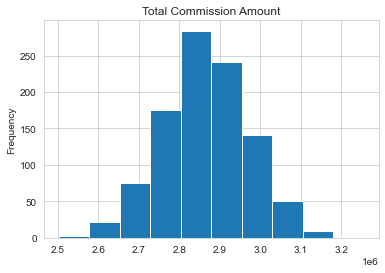

In [4]:
# Below is a full code on how Monte Carlo should be written
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

#loop through simulation
for i in range(num_simulations):
    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)
    
    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})
    
    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
    
    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
    
    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0), 
                      df['Commission_Amount'].sum().round(0), 
                      df['Sales_Target'].sum().round(0)])
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales', 'Commission_Amount', 'Sales_Target'])
results_df.describe().round(0).style.format('{:,}')
results_df['Commission_Amount'].plot(kind='hist', title="Total Commission Amount")
# code from 
    